In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

df = pd.read_csv("Salary.csv")
df_binary = df[['YearsExperience', 'Salary']]

df_binary.columns = ['YearsExperience', 'Salary']

df_binary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


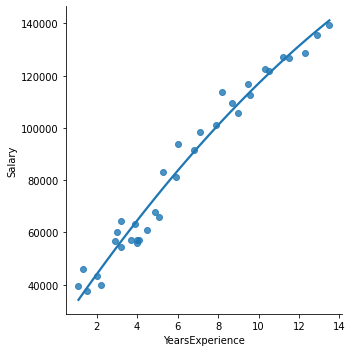

In [2]:
sns.lmplot(x ='YearsExperience', y ='Salary', data = df_binary, order = 2, ci = None)


In [3]:
pears_corr_coef = np.corrcoef(df.YearsExperience, df.Salary)
print(pears_corr_coef)

[[1.         0.98242725]
 [0.98242725 1.        ]]


In [4]:
df_binary.fillna(method ='ffill', inplace = True)

In [6]:
X = np.array(df_binary['YearsExperience']).reshape(-1, 1)
y = np.array(df_binary['Salary']).reshape(-1, 1)

df_binary.dropna(inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.966347522436931


predicted response:
[[ 46194.85772889]
 [118335.10297962]
 [ 41849.05982222]
 [ 63578.04935557]
 [128765.01795563]
 [100082.7517716 ]
 [140933.2520943 ]
 [ 54886.45354223]
 [ 74877.12391292]]


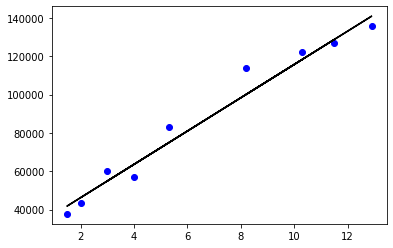

In [11]:
y_pred = regr.predict(X_test)
print(f"predicted response:\n{y_pred}")
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()


In [9]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 5770.644972249817
MSE: 44408464.975725755
RMSE: 6663.967660165058
